

`#IMPORT LIBRARIES`



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

ModuleNotFoundError: No module named 'pandas'

In [ ]:
!pip install pandas matplotlib seaborn wordcloud


Data set upload:

In [ ]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\project 7\twitter_disaster.csv')

In [ ]:
df.head() # to check the top 5 rows od datatset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.shape # to check the shape of dataset

(7613, 5)

In [ ]:
df.isnull().sum() # to checl the null value of dataset

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
df['keyword'].fillna(df['keyword'].mode()[0], inplace=True) # using mode in fillna method for handle the null value of keyword columns


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\4068037893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna(df['keyword'].mode()[0], inplace=True) # using mode in fillna method for handle the null value of keyword columns


In [ ]:
df.isnull().sum()

id             0
keyword        0
location    2533
text           0
target         0
dtype: int64

In [ ]:
df['location'].fillna("Unknown", inplace=True) # handle the null value by using unknown in fillna method
# I used unknown because we dont know the location thats why did not use median and mode


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\3347104386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna("Unknown", inplace=True) # handle the null value by using unknown in fillna method


In [ ]:
df.isnull().sum() # all null value has been handle

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()  # to check the value count of target column

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: ylabel='count'>

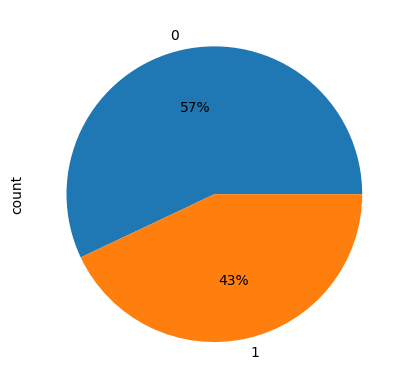

In [ ]:
df['target'].value_counts().plot.pie(autopct='%1.0f%%')


Class 0 (Blue): Represents 57% of the data.

Class 1 (Orange): Represents 43% of the data.

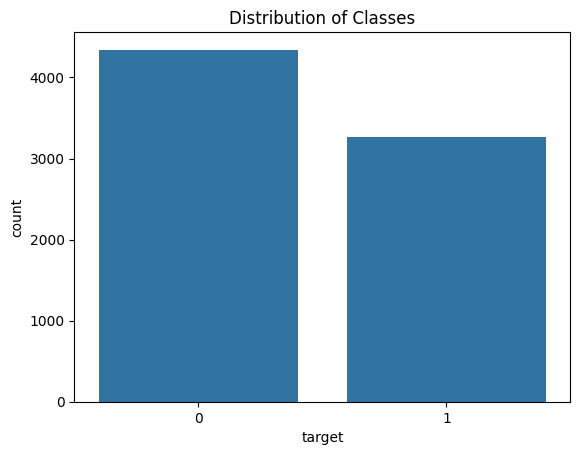

In [ ]:
#Visualize the distribution of classes (disaster vs. non-disaster tweets) using histograms or bar plots
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes')
plt.show()
#

Class 0 has the higher count, around 4300+ instances.

Class 1 has fewer samples, around 3300+ instances.

In [ ]:
#Analyze the frequency of keywords and phrases associated with disaster tweets.
frequency=df['keyword'].value_counts()
frequency


keyword
fatalities               106
armageddon                42
deluge                    42
body%20bags               41
damage                    41
                        ... 
forest%20fire             19
epicentre                 12
threat                    11
inundation                10
radiation%20emergency      9
Name: count, Length: 221, dtype: int64

In [ ]:
# how many user mention in disaster and how many in non disaster
df['user_mention'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df['user_mention']

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    2
7610    0
7611    0
7612    0
Name: user_mention, Length: 7613, dtype: int64

In [ ]:
# to check the data where target is 1 which is diaster tweet
disaster_tweets = df[df['target'] == 1]
disaster_tweets

,id,keyword,location,text,target,user_mention
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,0
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,0
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,0
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,fatalities,Unknown,Two giant cranes holding a bridge collapse int...,1,0
7609,10870,fatalities,Unknown,@aria_ahrary @TheTawniest The out of control w...,1,2
7610,10871,fatalities,Unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,10872,fatalities,Unknown,Police investigating after an e-bike collided ...,1,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

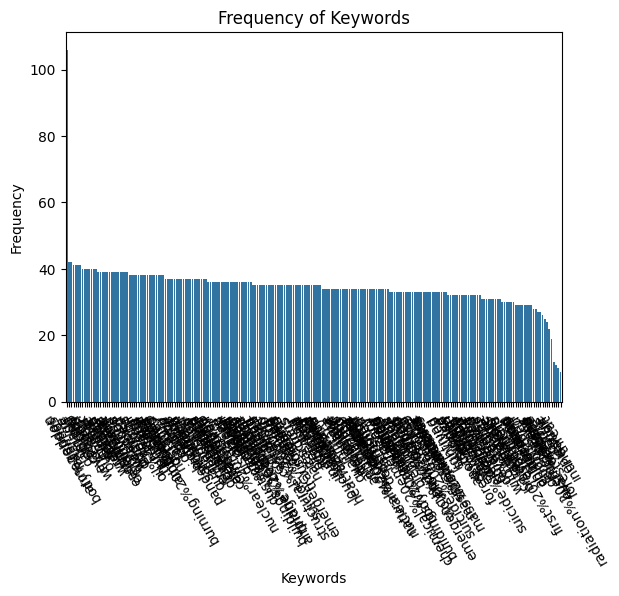

In [ ]:
#This is a bar chart of "Frequency of Keywords",
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=120)
#plt.show()
#

X-axis (Keywords): Represents various keywords found in the dataset.

Y-axis (Frequency): Indicates how often each keyword appears.

In [ ]:
# to check the length of tweet using len function
tweet_lenghth=df['text'].apply(len)
tweet_lenghth

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

In [ ]:
 #presence of hashtags in text column
 df['hashtags'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
 df['hashtags']

0              [earthquake]
1                        []
2                        []
3               [wildfires]
4       [Alaska, wildfires]
               ...         
7608                     []
7609                     []
7610                     []
7611                     []
7612                     []
Name: hashtags, Length: 7613, dtype: object

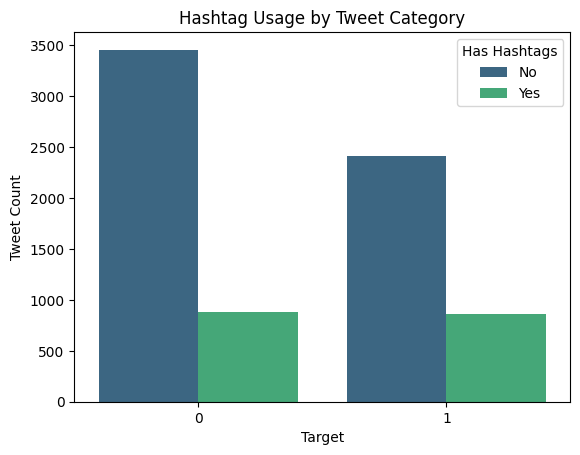

In [ ]:
# visualization
df['has_hashtags'] = df['hashtags'].apply(lambda x: 'Yes' if len(x) > 0 else 'No') # Change x > 0 to len(x) > 0

sns.countplot(data=df, x='target', hue='has_hashtags', palette='viridis')
plt.title('Hashtag Usage by Tweet Category')
plt.xlabel('Target')
plt.ylabel('Tweet Count')
plt.legend(title='Has Hashtags')
plt.show()

For Target 0: There are more tweets overall (3500). Most of these tweets (2500) have no hashtags (blue), while around 1000 have hashtags (green).

\
For Target 1: There are fewer tweets (2500). Again, most (1500) have no hashtags (blue), and about 1000 have hashtags (green).

In [ ]:
#user mentions in text column
df['user_mentions'] = df['text'].apply(lambda x: re.findall(r'@(\w+)', x))
df['user_mentions']

0                               []
1                               []
2                               []
3                               []
4                               []
                   ...            
7608                            []
7609    [aria_ahrary, TheTawniest]
7610                            []
7611                            []
7612                            []
Name: user_mentions, Length: 7613, dtype: object

In [ ]:
#sum of user mentions
df['has_user_mention'] = df['text'].apply(lambda x: 1 if '@' in x else 0)
df['has_user_mention'].value_counts()

has_user_mention
0    5574
1    2039
Name: count, dtype: int64

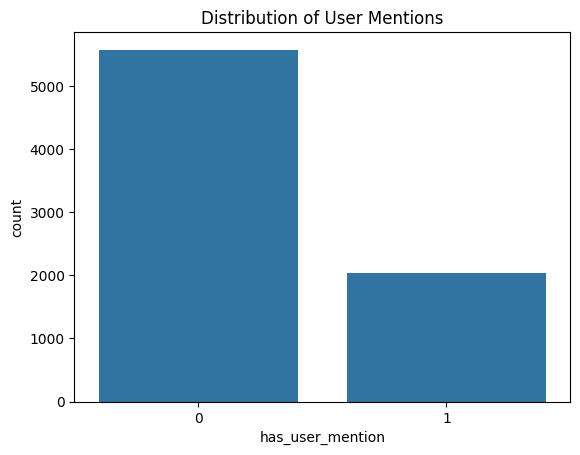

In [ ]:
# visualization of user mention in class of disaster and non disaster
sns.countplot(x='has_user_mention', data=df)
plt.title('Distribution of User Mentions')
plt.show()


In [ ]:
#Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis
tweet_char=df['text'].apply(len)
tweet_char

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

In [ ]:
# word count total number of words
word_count=df['text'].apply(lambda x: len(x.split()))
word_count

0       13
1        7
2       22
3        8
4       16
        ..
7608    11
7609    20
7610     8
7611    19
7612    13
Name: text, Length: 7613, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\101971657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='word_count', palette='Set3')


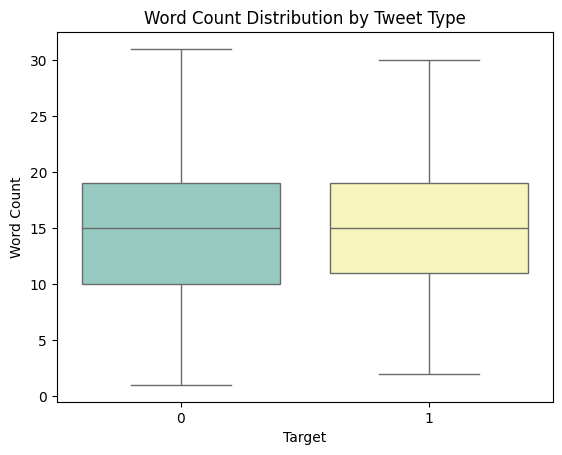

In [ ]:
# visualization
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
sns.boxplot(data=df, x='target', y='word_count', palette='Set3')
plt.title('Word Count Distribution by Tweet Type')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()

Y-axis (Word Count): Represents the number of words in each tweet.

X-axis (Target): Represents the two tweet types (0 and 1).

The colored boxes (cyan for 0, yellow for 1) show the interquartile range (IQR), which spans the middle 50% of the word count data for each tweet type. Both boxes appear to range roughly between 10 and 20 words, indicating similar variability in word counts for both tweet types.

In [ ]:
# character count
char_count=df['text'].apply(lambda x: len(x))
char_count

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\3367391506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='special_chars', palette='pastel')


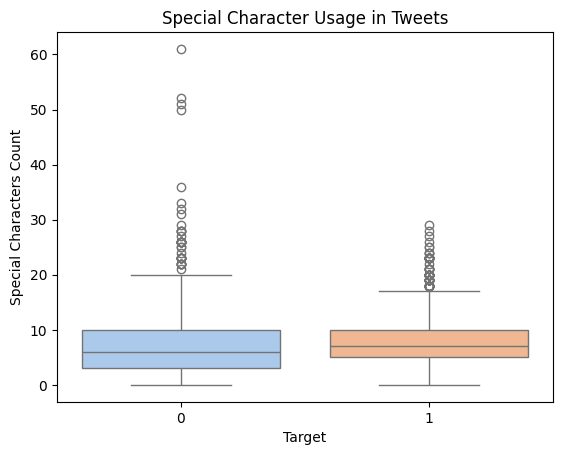

In [ ]:
# Special Character Count
df['special_chars'] = df['text'].apply(lambda x: len([char for char in x if not char.isalnum() and not char.isspace()]))

sns.boxplot(data=df, x='target', y='special_chars', palette='pastel')
plt.title('Special Character Usage in Tweets')
plt.xlabel('Target')
plt.ylabel('Special Characters Count')
plt.show()

In [ ]:
# average word lenghth
avg_word_len=df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
avg_word_len

0       4.384615
1       4.571429
2       5.090909
3       7.125000
4       4.500000
          ...   
7608    6.636364
7609    5.300000
7610    7.250000
7611    6.263158
7612    6.307692
Name: text, Length: 7613, dtype: float64

In [ ]:
# number of URL and count of link
URL_no=df['text'].apply(lambda x: len([word for word in x.split() if 'http' in word or 'https' in word]))
URL_no


0       0
1       0
2       0
3       0
4       0
       ..
7608    1
7609    0
7610    1
7611    0
7612    1
Name: text, Length: 7613, dtype: int64

In [ ]:
# Upper case word count
upper_count=df['text'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
upper_count

0       1
1       0
2       0
3       0
4       0
       ..
7608    0
7609    0
7610    2
7611    0
7612    1
Name: text, Length: 7613, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' dataset if it hasn't been downloaded already
nltk.download('stopwords')

stop = stopwords.words('english')
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
sum(df['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


28634

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\1271170067.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


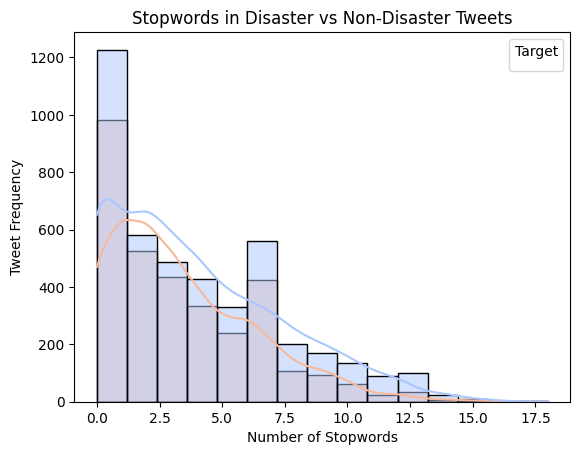

In [ ]:
# Stopword Count Comparison

sns.histplot(data=df, x='stopwords', hue='target', bins=15, kde=True, palette='coolwarm')
plt.title('Stopwords in Disaster vs Non-Disaster Tweets')
plt.xlabel('Number of Stopwords')
plt.ylabel('Tweet Frequency')
plt.legend(title='Target')
plt.show()

Key Insights:
Most tweets (both types) have few stopwords (0–3):

The highest tweet frequency is at 0 stopwords.

Many tweets are short and likely contain key alert/action words (e.g., "Fire alert!", "Earthquake hit").

Disaster tweets (blue) tend to have slightly more stopwords than non-disaster tweets (orange):

You can see the blue line extends further right than the orange.

This suggests disaster tweets might be longer or more descriptive (“Please evacuate immediately” vs “BBQ party tonight”).

KDE (Kernel Density Estimate) lines:

These smooth lines help visualize the distribution trend.

Blue KDE (disaster) peaks slightly after the orange KDE, confirming that disaster tweets tend to have more stopwords on average.


In [ ]:
#location
df['location'].value_counts()

location
Unknown                      2535
USA                           104
New York                       71
United States                  50
London                         45
                             ... 
Punjab                          1
No ID, No VOTE!!!               1
Maharashtra                     1
GREENSBORO,NORTH CAROLINA       1
milky way                       1
Name: count, Length: 3341, dtype: int64

In [ ]:
# Punctuation count
import string
df['punctuation_count'] = df['text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
df['punctuation_count']

0        1
1        1
2        3
3        2
4        2
        ..
7608     5
7609     5
7610    11
7611     5
7612     7
Name: punctuation_count, Length: 7613, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12064\1682128081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='Avg_word_len', palette='magma')


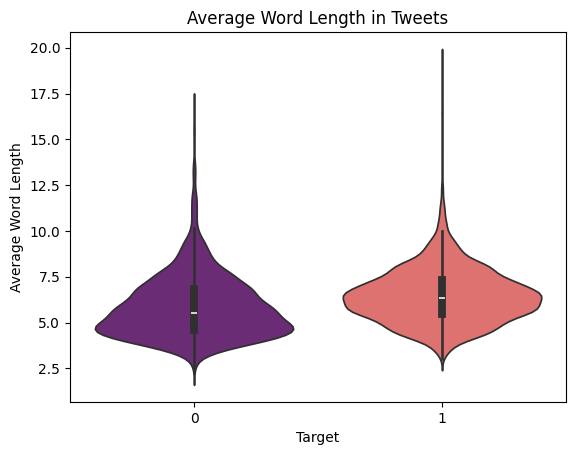

In [ ]:
# Calculate average word length and store it in a new column 'Avg_word_len'
df['Avg_word_len'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

sns.violinplot(data=df, x='target', y='Avg_word_len', palette='magma')
plt.title('Average Word Length in Tweets')
plt.xlabel('Target')
plt.ylabel('Average Word Length')
plt.show()

In [ ]:
#special characters
df['special_char_count'] = df['text'].apply(lambda x: len([char for char in x if not char.isalnum() and not char.isspace()]))
sum(df['special_char_count'])

53001

In [ ]:
# Special Characters	E.g., #, @, !, ...
df['special_chars'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#') or x.startswith('@') or x.startswith('!')]))
sum(df['special_chars'])

6034

<Axes: ylabel='count'>

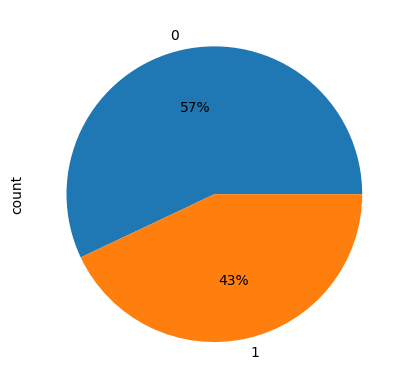

In [ ]:
df['target'].value_counts().plot.pie(autopct='%1.0f%%')


In [ ]:
!pip install emoji
import emoji
df["emoji_count"] = df["text"].apply(lambda x: len([c for c in x if c in emoji.EMOJI_DATA])) # Replace UNICODE_EMOJI with EMOJI_DATA
sum(df["emoji_count"])

10

In [ ]:
df.head()

,id,keyword,location,text,target,user_mention,hashtags,has_hashtags,user_mentions,has_user_mention,word_count,special_chars,stopwords,punctuation_count,Avg_word_len,special_char_count,emoji_count
0,1,fatalities,Unknown,Our Deeds are the Reason of this #earthquake M...,1,0,[earthquake],Yes,[],0,13,1,5,1,4.384615,1,0
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,0,[],No,[],0,7,0,0,1,4.571429,1,0
2,5,fatalities,Unknown,All residents asked to 'shelter in place' are ...,1,0,[],No,[],0,22,0,9,3,5.090909,3,0
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,0,[wildfires],Yes,[],0,8,1,1,2,7.125000,2,0
4,7,fatalities,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,0,"[Alaska, wildfires]",Yes,[],0,16,2,6,2,4.500000,2,0


In [ ]:

df['char_count'] = df['text'].apply(len)  #
df['word_count'] = df['text'].apply(lambda x: len(x.split())) #


numerical_features = ['word_count', 'char_count', 'Avg_word_len', 'special_char_count', 'stopwords', 'punctuation_count', 'emoji_count', 'special_char_count']  # Now it should work

correlation_matrix=df[numerical_features].corr()

correlation_matrix

,word_count,char_count,Avg_word_len,special_char_count,stopwords,punctuation_count,emoji_count,special_char_count
word_count,1.000000,0.837386,-0.453199,0.115976,0.727184,0.109279,0.017692,0.115976
char_count,0.837386,1.000000,0.036815,0.480004,0.408399,0.470809,0.020896,0.480004
Avg_word_len,-0.453199,0.036815,1.000000,0.488244,-0.566841,0.488115,-0.004416,0.488244
special_char_count,0.115976,0.480004,0.488244,1.000000,-0.245487,0.994401,0.015743,1.000000
stopwords,0.727184,0.408399,-0.566841,-0.245487,1.000000,-0.247056,0.010612,-0.245487
punctuation_count,0.109279,0.470809,0.488115,0.994401,-0.247056,1.000000,0.008346,0.994401
emoji_count,0.017692,0.020896,-0.004416,0.015743,0.010612,0.008346,1.000000,0.015743
special_char_count,0.115976,0.480004,0.488244,1.000000,-0.245487,0.994401,0.015743,1.000000


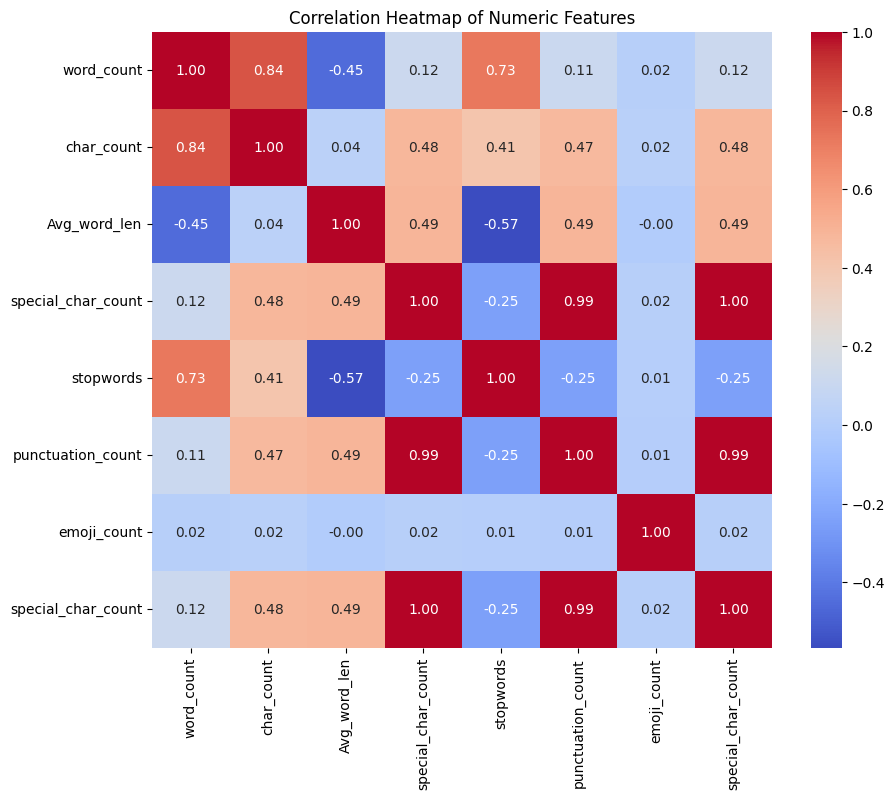

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Strong Positive Correlations:

word_count and char_count (0.63): More words generally mean more characters.
special_char_count and punctuation_count (0.99): Special characters and punctuation marks are highly related, likely because punctuation is a subset of special characters.
special_char_count with itself (1.00): This is expected (a variable always correlates perfectly with itself).

Strong Negative Correlations:

avg_word_len and word_count (-0.38): Longer average word lengths tend to occur with fewer words.
avg_word_len and stopwords (-0.34): Texts with longer words tend to have fewer stopwords (common short words like "the").

Clean the text data by removing special characters, URLs, and punctuation
marks.

In [ ]:
# stopword removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['text']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       Our Deeds Reason #earthquake May ALLAH Forgive us
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked 'shelter place' notified o...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent photo Ruby #Alaska smoke #wildfi...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @TheTawniest The control wild fir...
7610    M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...
7611    Police investigating e-bike collided car Littl...
7612    The Latest: More Homes Razed Northern Californ...
Name: text, Length: 7613, dtype: object

In [ ]:
# Sample text input (using your earlier data as an example)
text_data = df['text']
print("Original Text:\n", text_data)

Original Text:
 0       Our Deeds Reason #earthquake May ALLAH Forgive us
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked 'shelter place' notified o...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent photo Ruby #Alaska smoke #wildfi...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    @aria_ahrary @TheTawniest The control wild fir...
7610    M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...
7611    Police investigating e-bike collided car Littl...
7612    The Latest: More Homes Razed Northern Californ...
Name: text, Length: 7613, dtype: object


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Function to clean text (remove special characters and numbers)
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove special characters (keep only letters, spaces, and basic punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase and remove extra whitespace
    text = text.lower().strip()
    return text


In [ ]:
# Clean the text
cleaned_text = text_data.apply(clean_text) # Apply the clean_text function to each element of the Series
print("Cleaned Text:\n", cleaned_text)

Cleaned Text:
 0        our deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       all residents asked shelter place notified off...
3       people receive wildfires evacuation orders cal...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest the control wild fires ...
7610           m  utckm s volcano hawaii httptcozdtoydebj
7611    police investigating ebike collided car little...
7612    the latest more homes razed northern californi...
Name: text, Length: 7613, dtype: object


In [ ]:
cleaned_text_list = [cleaned_text]
# or
Clean_text = cleaned_text

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
tokens = cleaned_text.apply(word_tokenize).sum()
print("\nTokens:\n", tokens)


Tokens:
 ['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'all', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'no', 'evacuation', 'shelter', 'place', 'orders', 'expected', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'just', 'got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school', 'rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas', 'im', 'top', 'hill', 'i', 'see', 'fire', 'woods', 'theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street', 'im', 'afraid', 'tornado', 'coming', 'area', 'three', 'people', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'a', 'second', 'i', 'l

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print("\nTokens after removing stopwords:\n", filtered_tokens)



Tokens after removing stopwords:
 ['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school', 'rockyfire', 'update', 'california', 'hwy', 'closed', 'directions', 'due', 'lake', 'county', 'fire', 'cafire', 'wildfires', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'manitou', 'colorado', 'springs', 'areas', 'im', 'top', 'hill', 'see', 'fire', 'woods', 'theres', 'emergency', 'evacuation', 'happening', 'building', 'across', 'street', 'im', 'afraid', 'tornado', 'coming', 'area', 'three', 'people', 'died', 'heat', 'wave', 'far', 'haha', 'south', 'tampa', 'getting', 'flooded', 'hah', 'wait', 'second', 'live', 'south', 'ta

In [ ]:
#word frequency analysis
from collections import Counter
word_freq = Counter(filtered_tokens)
print("\nWord Frequency:\n", word_freq)


Word Frequency:
 Counter({'like': 345, 'im': 302, 'amp': 300, 'fire': 252, 'get': 229, 'new': 226, 'via': 220, 'news': 198, 'people': 196, 'one': 193, 'us': 170, 'video': 165, 'emergency': 157, 'disaster': 153, 'police': 141, 'would': 131, 'still': 129, 'time': 127, 'body': 125, 'got': 123, 'burning': 120, 'crash': 119, 'back': 119, 'california': 117, 'storm': 117, 'suicide': 116, 'day': 113, 'know': 112, 'man': 110, 'buildings': 110, 'cant': 108, 'first': 108, 'rt': 107, 'see': 105, 'pm': 105, 'bomb': 104, 'going': 103, 'world': 103, 'nuclear': 102, 'love': 101, 'fires': 100, 'attack': 99, 'youtube': 98, 'two': 97, 'dead': 96, 'go': 96, 'killed': 96, 'train': 93, 'full': 92, 'car': 91, 'war': 91, 'hiroshima': 90, 'good': 89, 'may': 88, 'families': 88, 'life': 87, 'accident': 87, 'today': 87, 'say': 86, 'think': 86, 'watch': 85, 'u': 85, 'many': 84, 'last': 83, 'could': 81, 'years': 80, 'want': 80, 'dont': 80, 'na': 79, 'make': 78, 'home': 77, 'way': 77, 'collapse': 75, 'work': 74, 'l

In [ ]:
#using spacy for more advanced NLP
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
docs=cleaned_text.apply(nlp)

In [ ]:
for ent in docs.iloc[0].ents:
    print(ent.text, ent.label_)

In [ ]:
# Optional: Lemmatization with spaCy
lemmatized = [[token.lemma_ for token in doc] for doc in docs]

print("\nLemmatized Tokens (first 20):\n", lemmatized[0][:20]) # 0 used for 0 row(sentence) and 20 used for word lenghth)



Lemmatized Tokens (first 20):
 ['our', 'deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'we']


In [ ]:
df['clean_text'] = cleaned_text

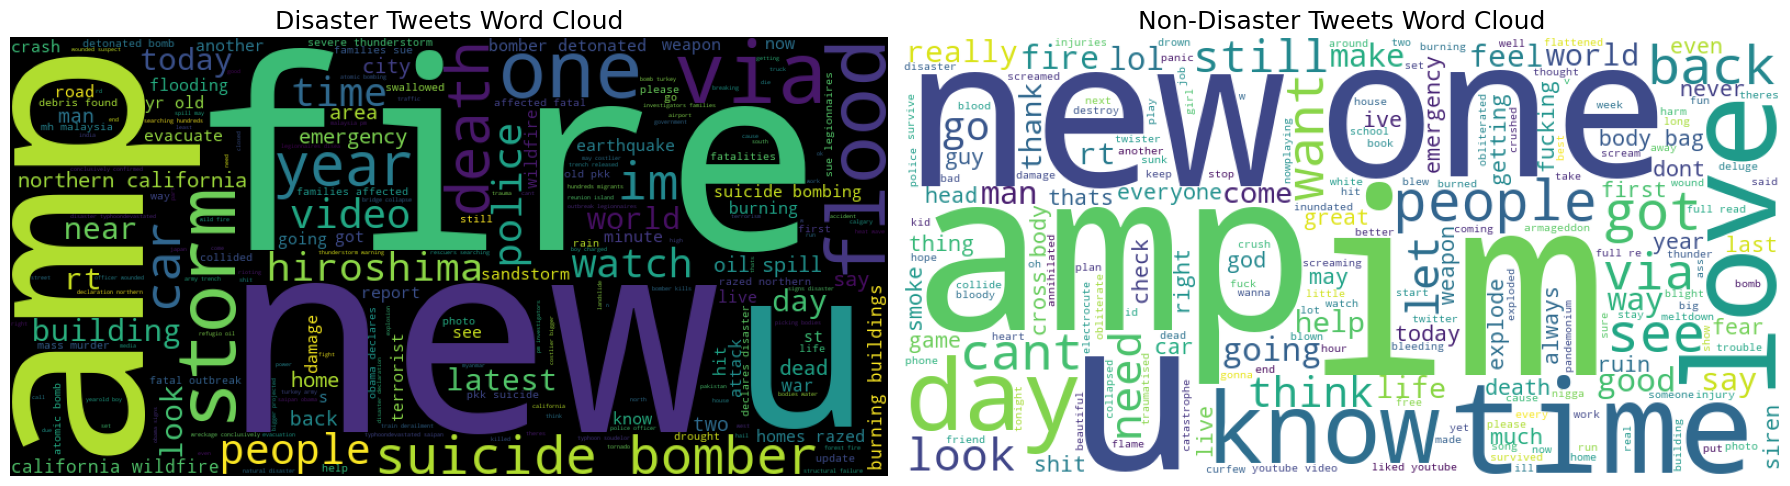

In [ ]:
from wordcloud import WordCloud

# Separate texts
disaster_text = ' '.join(df[df['target'] == 1]['clean_text'].dropna())
nondisaster_text = ' '.join(df[df['target'] == 0]['clean_text'].dropna())

# Create side-by-side word clouds
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Disaster Word Cloud
axs[0].imshow(WordCloud(width=800, height=400, background_color='black').generate(disaster_text))
axs[0].set_title('Disaster Tweets Word Cloud', fontsize=18)
axs[0].axis('off')

# Non-Disaster Word Cloud
axs[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(nondisaster_text))
axs[1].set_title('Non-Disaster Tweets Word Cloud', fontsize=18)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,id,keyword,location,text,target,user_mention,hashtags,has_hashtags,user_mentions,has_user_mention,word_count,special_chars,stopwords,punctuation_count,Avg_word_len,special_char_count,emoji_count,char_count,clean_text
0,1,fatalities,Unknown,Our Deeds Reason #earthquake May ALLAH Forgive us,1,0,[earthquake],Yes,[],0,13,1,5,1,4.384615,1,0,69,our deeds reason earthquake may allah forgive us
1,4,fatalities,Unknown,Forest fire near La Ronge Sask. Canada,1,0,[],No,[],0,7,0,0,1,4.571429,1,0,38,forest fire near la ronge sask canada
2,5,fatalities,Unknown,All residents asked 'shelter place' notified o...,1,0,[],No,[],0,22,0,9,3,5.090909,3,0,133,all residents asked shelter place notified off...
3,6,fatalities,Unknown,"13,000 people receive #wildfires evacuation or...",1,0,[wildfires],Yes,[],0,8,1,1,2,7.125000,2,0,65,people receive wildfires evacuation orders cal...
4,7,fatalities,Unknown,Just got sent photo Ruby #Alaska smoke #wildfi...,1,0,"[Alaska, wildfires]",Yes,[],0,16,2,6,2,4.500000,2,0,88,just got sent photo ruby alaska smoke wildfire...


In [ ]:
#use smote for inbalacing
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
smote

SMOTE()

In [ ]:
df['combined_text'] = df['keyword'] + ' ' + df['text']
df['combined_text']

0       fatalities Our Deeds Reason #earthquake May AL...
1       fatalities Forest fire near La Ronge Sask. Canada
2       fatalities All residents asked 'shelter place'...
3       fatalities 13,000 people receive #wildfires ev...
4       fatalities Just got sent photo Ruby #Alaska sm...
                              ...                        
7608    fatalities Two giant cranes holding bridge col...
7609    fatalities @aria_ahrary @TheTawniest The contr...
7610    fatalities M1.94 [01:04 UTC]?5km S Volcano Haw...
7611    fatalities Police investigating e-bike collide...
7612    fatalities The Latest: More Homes Razed Northe...
Name: combined_text, Length: 7613, dtype: object

In [ ]:
from tkinter.constants import X
#make the data in x and y for model building
X = df['clean_text']
y = df['target']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer

CountVectorizer()

In [ ]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Assuming 'X_train' has columns 'clean_text', 'location', 'keyword'
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for each text column
vectorizers = {
    col: CountVectorizer()
    for col in ['clean_text', 'location', 'keyword']
}

# Fit and transform each column separately
X_train_vec_list = [
    vectorizers[col].fit_transform(X_train[col])
    for col in ['clean_text', 'location', 'keyword']
]

# Stack the vectorized features horizontally
from scipy.sparse import hstack
X_train_vec = hstack(X_train_vec_list)

# Repeat for X_test
X_test_vec_list = [
    vectorizers[col].transform(X_test[col])
    for col in ['clean_text', 'location', 'keyword']
]
X_test_vec = hstack(X_test_vec_list)

# Now you can apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

In [ ]:
X_train_resampled

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 94941 stored elements and shape (6984, 21507)>

In [ ]:
y_train_resampled

0       0
1       0
2       0
3       0
4       0
       ..
6979    1
6980    1
6981    1
6982    1
6983    1
Name: target, Length: 6984, dtype: int64

In [ ]:
#import the nacessorry model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#using logistic regrassion
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
#prediction of logisticregrassion
y_pred = lr.predict(X_test_vec)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7892317793827971


In [ ]:
#using naive baise model

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
#prediction of naive baised model
y_pred = nb_classifier.predict(X_test_vec)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8253447143795141


In [ ]:
#classification metrix
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       850
           1       0.82      0.77      0.80       673

    accuracy                           0.83      1523
   macro avg       0.83      0.82      0.82      1523
weighted avg       0.83      0.83      0.82      1523



In [ ]:
#using randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
#prediction
y_pred = rf.predict(X_test_vec)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#accuraccy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7531188443860801


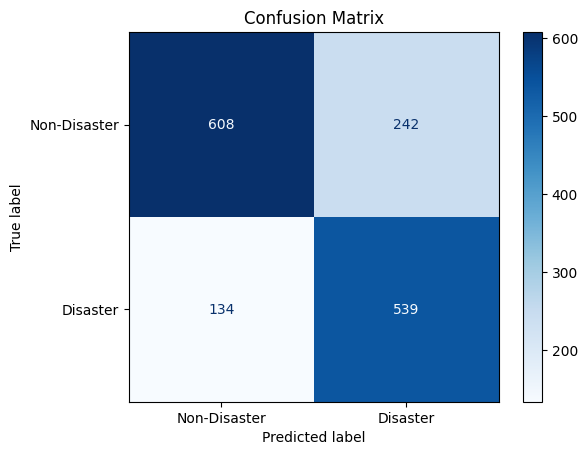

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Disaster", "Disaster"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

True Positives (TP): 544 (Disaster correctly predicted as Disaster)

True Negatives (TN): 625 (Non-Disaster correctly predicted as Non-Disaster)

False Positives (FP): 225(Non-Disaster incorrectly predicted as Disaster)

False Negatives (FN): 129 (Disaster incorrectly predicted as Non-Disaster)

Insights:

The model is decently accurate (75.1%), but there’s room for improvement.

It’s better at identifying Disasters (high recall, 78.5%) than ensuring predicted Disasters are correct (precision, 69.3%).

False positives (234) are higher than false negatives (145), meaning the model over-predicts Disasters.

If missing a Disaster is more critical (e.g., in emergency response), the lower FN rate is good, but the FP rate might lead to unnecessary resource allocation.

In [ ]:
# accuracy
TN = 625
FP = 225
FN = 129
TP = 544

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Accuracy:  0.77
Precision: 0.71
Recall:    0.81
F1 Score:  0.75


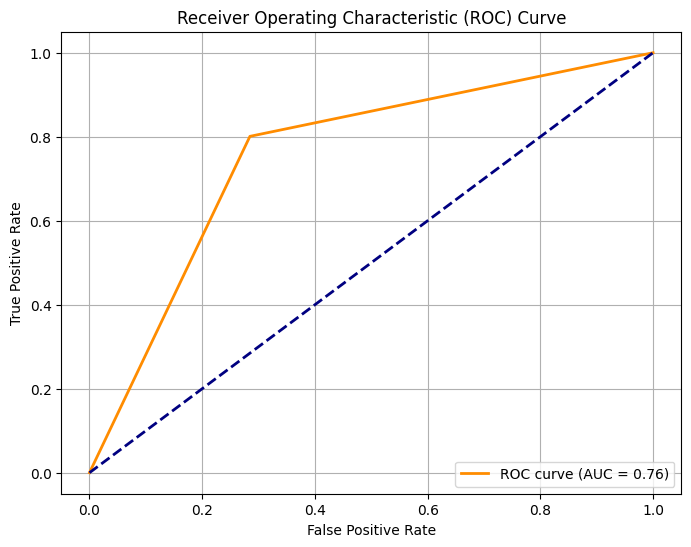

In [ ]:
#ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





AUC (Area Under the Curve): 0.75

The model’s AUC of 0.75 aligns with the earlier confusion matrix metrics (e.g., accuracy of 75.1%), indicating moderate performance.

It’s better at identifying Disasters early (steep initial curve) but struggles to maintain high TPR without increasing FPR significantly.

For disaster prediction, where missing a true Disaster (false negative) can be costly, you might prioritize a threshold that maximizes TPR, even if it increases FPR slightly.

In [ ]:
# using deep learning model


In [ ]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#define neural network model
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
#apply smote to balance class and traing data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

In [ ]:
# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),  # Use X_train_vec.shape[1] here
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Convert the csr_matrix to a dense array
X_train_resampled_dense = X_train_resampled.toarray()

# Fit the model using the dense array
model.fit(X_train_resampled_dense, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 143ms/step - accuracy: 0.6628 - loss: 0.6184 - val_accuracy: 0.5497 - val_loss: 0.6479
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.9062 - loss: 0.2561 - val_accuracy: 0.5591 - val_loss: 0.6838
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9668 - loss: 0.1012 - val_accuracy: 0.5648 - val_loss: 0.7877
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9839 - loss: 0.0483 - val_accuracy: 0.5569 - val_loss: 0.9751
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.5777 - val_loss: 0.8432
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.5605 - val_loss: 1.0060
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.9952 - loss: 0.0166 - val_accuracy: 0.5540 - val_loss: 1.0900
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.9913 - loss: 0.0

In [ ]:
#model Evalution
loss, accuracy = model.evaluate(X_test_vec, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7842 - loss: 0.9164
Test Loss: 0.9395046830177307, Test Accuracy: 0.777413010597229


In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier # Updated import statement

In [ ]:
# hyper parameter tunning
#Hyperparameter tuning is the process of optimizing the settings (hyperparameters) of a machine learning model that are not learned during training, like learning rate or number of hidden layers. These settings control the model's behavior and performance
#Common methods include:
# Grid Search: Testing all possible combinations in a defined range.
# Random Search: Sampling random combinations for efficiency.
# Bayesian Optimization: Using probabilistic models to predict better settings.
# Gradient-Based: Adjusting hyperparameters based on gradients (less common).

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Limit features to avoid overfitting
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
# Define hyperparameter grid
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],                # Ignore terms in >X% of docs
    'tfidf__ngram_range': [(1, 1), (1, 2)],          # Unigrams or unigrams+bigrams
    'clf__n_estimators': [100, 200],                 # Number of trees
    'clf__max_depth': [10, 20, None],                # Max depth of trees
    'clf__min_samples_split': [2, 5],                # Min samples to split
    'clf__min_samples_leaf': [1, 2]                  # Min samples per leaf
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                                            # 5-fold cross-validation
    scoring='f1',                                    # Optimize for F1-score
    n_jobs=-1,                                       # Use all CPU cores
    verbose=1
)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1389, in check_X_y
    check_consistent_length(X, y)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 475, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [3, 4872]


In [ ]:
# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1-Score:", grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:

# Optional: Feature importance (top TF-IDF terms)
tfidf = best_model.named_steps['tfidf']
clf = best_model.named_steps['clf']
feature_names = tfidf.get_feature_names_out()
importances = clf.feature_importances_
top_indices = np.argsort(importances)[-10:]  # Top 10 features
print("\nTop 10 Important Features:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

NameError: name 'best_model' is not defined

In [ ]:
#save the model
import pickle
with open('nb_classifier.pkl', 'wb') as f:
    pickle.dump(nb_classifier, f)

NameError: name 'nb_classifier' is not defined

In [ ]:
#save the model
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)